In [ ]:
cd /content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100

/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100


In [ ]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
!pip install "transformers[torch]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
!pip install torch-optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
!python main.py --option 8

2025-05-29 10:25:06.142234: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 10:25:06.157792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748514306.176067    4108 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748514306.181422    4108 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 10:25:06.199667: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [9]:
import re
import matplotlib.pyplot as plt

def show_accuracy_plot_from_file(filepath):
    # Đọc nội dung log từ file
    with open(filepath, 'r') as f:
        log_text = f.read()

    # Trích xuất Train Accuracy và Test Accuracy
    train_acc = [float(acc) for acc in re.findall(r"Train Accuracy=(\d+\.\d+)%", log_text)]
    test_acc = [float(acc) for acc in re.findall(r"Test Accuracy: (\d+\.\d+)%", log_text)]
    epochs = list(range(1, len(train_acc) + 1))

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_acc, marker='o', label='Train Accuracy')
    plt.plot(epochs, test_acc, marker='s', label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("SwinTransformer: Training and Validation Accuracy per Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


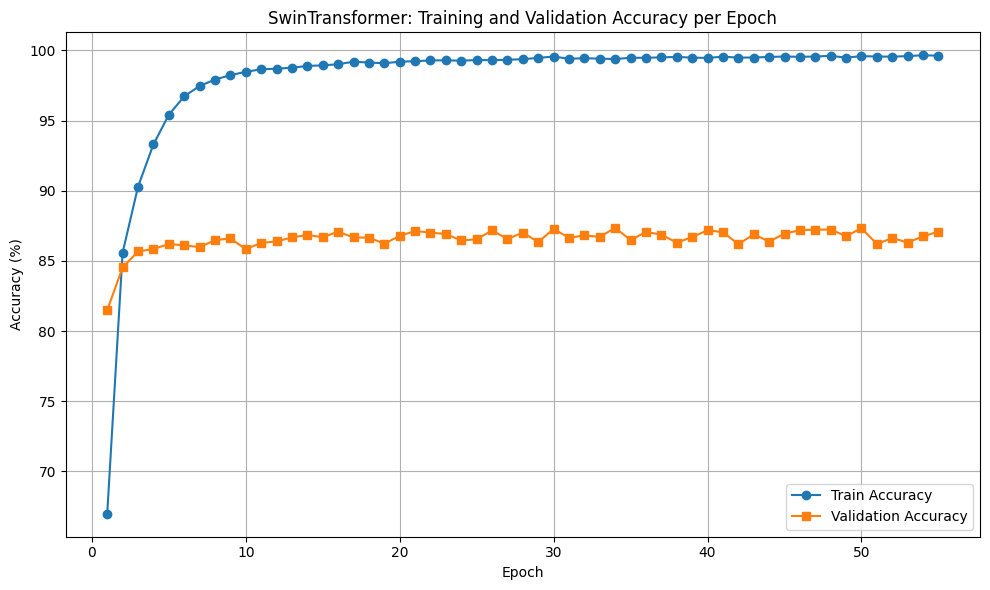

In [10]:
show_accuracy_plot_from_file("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_SwinTransformer.txt")

# Visualize training accuracy all model

In [1]:
import re

def extract_train_accuracy_SwinTransformer(filepath):
    """
    Đọc log file và trả về list các giá trị training accuracy qua các epoch.
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [float(acc) for acc in re.findall(r"Train Accuracy=(\d+\.\d+)%", log_text)]
    return train_acc

In [2]:
train_accuracy_SwinTransformer = extract_train_accuracy_SwinTransformer("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_SwinTransformer.txt")

In [3]:
import re

def extract_train_accuracy_from_file_CNN(filepath):
    """
    Đọc file log và trả về list các giá trị training accuracy (%) theo từng epoch.
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [float(acc) for acc in re.findall(r"Train Acc: (\d+\.\d+)%", log_text)]
    return train_acc

In [4]:
train_accuracy_CNN = extract_train_accuracy_from_file_CNN("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_CNN.txt")

In [5]:
import re

def extract_train_accuracy_convnext_from_file_ConvNeXt(filepath):
    """
    Trích xuất danh sách training accuracy (%) từ file log của ConvNeXtTiny.
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [
        float(x)
        for x in re.findall(r"\[ConvNeXtTiny\] Epoch \d+: Loss=[\d\.]+, Accuracy=(\d+\.\d+)%", log_text)
    ]

    return train_acc

In [6]:
train_accuracy_ConvNeXt = extract_train_accuracy_convnext_from_file_ConvNeXt("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_ConvNeXt.txt")

In [7]:
import re

def extract_train_accuracy_densenet_from_file_DenseNet(filepath):
    """
    Trích xuất danh sách training accuracy (%) từ file log của DenseNet121.
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [
        float(x)
        for x in re.findall(r"\[DenseNet121\] Epoch \d+: Train Loss=[\d\.]+, Train Acc=(\d+\.\d+)%", log_text)
    ]

    return train_acc


In [8]:
train_accuracy_DenseNet = extract_train_accuracy_densenet_from_file_DenseNet("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_DenseNet.txt")

In [10]:
import re

def extract_train_accuracy_custom_log_EfficientNet(filepath):
    """
    Trích xuất danh sách training accuracy (%) từ file log định dạng custom
    với dòng: Epoch [x/y] Train Loss: ... | Train Acc: ...
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [
        float(x)
        for x in re.findall(r"Epoch \[\d+/\d+\] Train Loss: [\d\.]+ \| Train Acc: (\d+\.\d+)%", log_text)
    ]

    return train_acc


In [11]:
train_accuracy_EfficientNet = extract_train_accuracy_custom_log_EfficientNet("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_EfficientNet.txt")

In [12]:
import re

def extract_train_accuracy_from_log_ResNet(filepath):
    """
    Trích xuất danh sách training accuracy (%) từ file log có dòng:
    Epoch [xx/xx], Loss: ..., Train Acc: xx.xx%
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [
        float(x)
        for x in re.findall(r"Epoch \[\d+/\d+\], Loss: [\d\.]+, Train Acc: (\d+\.\d+)%", log_text)
    ]
    return train_acc


In [13]:
train_accuracy_ResNet = extract_train_accuracy_from_log_ResNet("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_ResNet.txt")

In [14]:
import re

def extract_train_accuracy_from_vit_log_VisionTransformer(filepath):
    """
    Trích xuất danh sách training accuracy từ file log huấn luyện ViT,
    theo định dạng dòng:
    Epoch [x/y], Loss: ..., Train Acc: xx.xx%
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [
        float(x)
        for x in re.findall(r"Epoch \[\d+/\d+\], Loss: [\d\.]+, Train Acc: (\d+\.\d+)%", log_text)
    ]
    return train_acc


In [15]:
train_accuracy_VisionTransformer = extract_train_accuracy_from_vit_log_VisionTransformer("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_VisionTransformer.txt")

In [16]:
import re

def extract_train_accuracy_only_VGG16(filepath):
    """
    Trích xuất train accuracy từ log file theo định dạng:
    Epoch [x/y], Loss: ..., Train Acc: xx.xx%
    Trả về: list các giá trị train accuracy theo thứ tự epoch
    """
    with open(filepath, 'r') as f:
        log_text = f.read()

    train_acc = [
        float(x)
        for x in re.findall(r"Epoch \[\d+/\d+\], Loss: [\d\.]+, Train Acc: (\d+\.\d+)%", log_text)
    ]

    return train_acc


In [17]:
train_accuracy_VGG16 = extract_train_accuracy_only_VGG16("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_VGG16.txt")

In [20]:
import matplotlib.pyplot as plt

def plot_multiple_train_accuracies(
    train_accuracy_CNN, train_accuracy_ResNet, train_accuracy_VGG16, train_accuracy_DenseNet,
    train_accuracy_EfficientNet, train_accuracy_ConvNeXt, train_accuracy_VisionTransformer, train_accuracy_SwinTransformer
):
    """
    Vẽ biểu đồ 8 đường Train Accuracy theo epoch từ các model khác nhau.

    Parameters:
        vit_acc (list[float])
        swin_acc (list[float])
        convnext_acc (list[float])
        densenet_acc (list[float])
        efficientnet_acc (list[float])
        baseline1_acc (list[float])
        baseline2_acc (list[float])
        baseline3_acc (list[float])
    """
    plt.figure(figsize=(12, 7))

    models = {
        "CNN": train_accuracy_CNN,
        "ResNet34": train_accuracy_ResNet,
        "VGG16": train_accuracy_VGG16,
        "DenseNet121": train_accuracy_DenseNet,
        "EfficientNet": train_accuracy_EfficientNet,
        "ConvNeXt": train_accuracy_ConvNeXt,
        "VisionTransformer": train_accuracy_VisionTransformer,
        "SwinTransformer": train_accuracy_SwinTransformer,
    }

    for name, acc_list in models.items():
        epochs = list(range(1, len(acc_list) + 1))
        plt.plot(epochs, acc_list, marker='o', label=name)

    plt.xlabel("Epoch")
    plt.ylabel("Train Accuracy (%)")
    plt.title("Comparison of Training Accuracy across models")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

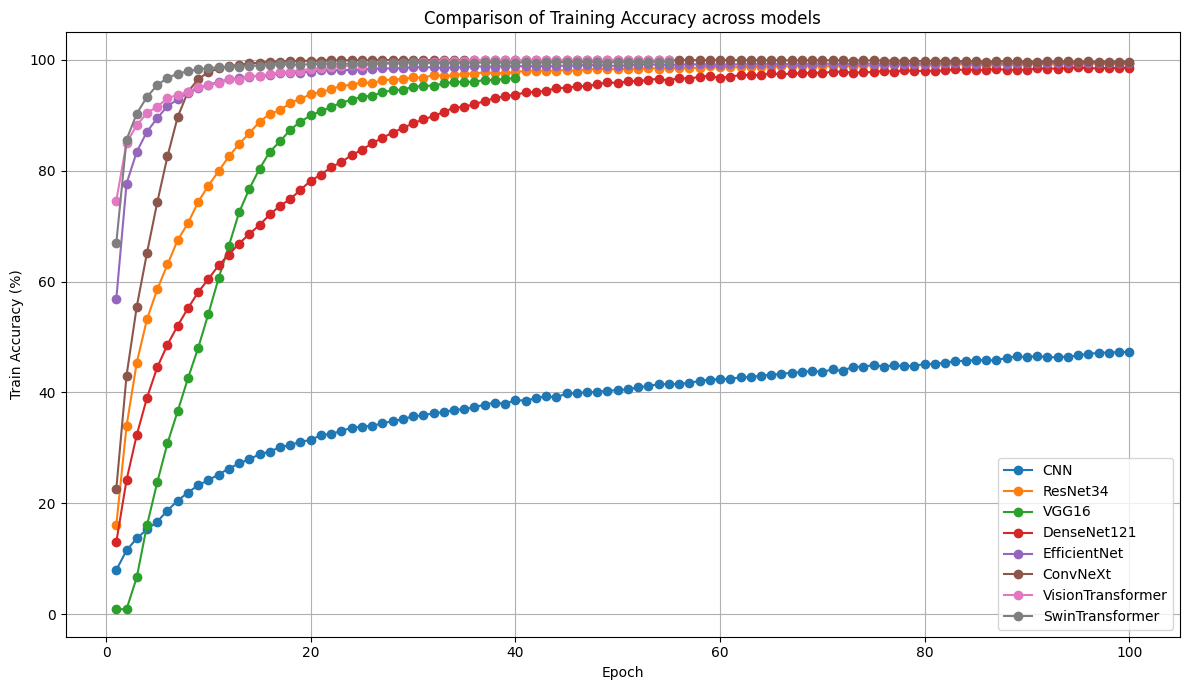

In [21]:
plot_multiple_train_accuracies(
    train_accuracy_CNN, train_accuracy_ResNet, train_accuracy_VGG16, train_accuracy_DenseNet,
    train_accuracy_EfficientNet, train_accuracy_ConvNeXt, train_accuracy_VisionTransformer, train_accuracy_SwinTransformer
)